In [1]:
# Import the required modules
import pandas as pd
import pycountry
import pycountry_convert as pc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create DataFrames
df_aquaculture_owid = pd.read_csv("aquaculture-farmed-fish-production_owid.csv")
df_aquaculture_tidy = pd.read_csv("aquaculture-farmed-fish-production_tidytuesday.csv")
df_cap_vs_aqua_owid = pd.read_csv("capture-fisheries-vs-aquaculture_owid.csv")
df_cap_vs_aqua_tidy = pd.read_csv("capture-fisheries-vs-aquaculture_tidytuesday.csv")
df_capture_owid = pd.read_csv("capture-fishery-production_owid.csv")
df_capture_tidy = pd.read_csv("capture-fishery-production_tidytuesday.csv")
df_fish_seafood_cons_owid = pd.read_csv("fish-and-seafood-consumption-per-capita_owid.csv")
df_fish_seafood_cons_tidy = pd.read_csv("fish-and-seafood-consumption-per-capita_tidytuesday.csv")
df_fish_seafood_owid = pd.read_csv("fish-seafood-production_owid.csv")

In [3]:
# Print 1st DataFrame
df_aquaculture_owid.head()

,Entity,Code,Year,Aquaculture production (metric tons)
0,Afghanistan,AFG,1960,0.0
1,Afghanistan,AFG,1961,0.0
2,Afghanistan,AFG,1962,0.0
3,Afghanistan,AFG,1963,0.0
4,Afghanistan,AFG,1964,0.0


In [4]:
# Print 2nd DataFrame
df_aquaculture_tidy.head()

,Entity,Code,Year,Aquaculture production (metric tons)
0,Afghanistan,AFG,1969,60.0
1,Afghanistan,AFG,1970,60.0
2,Afghanistan,AFG,1971,60.0
3,Afghanistan,AFG,1972,60.0
4,Afghanistan,AFG,1973,60.0


In [5]:
# Print 3rd DataFrame
df_cap_vs_aqua_owid.head()

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,0.0,200.0
1,Afghanistan,AFG,1961,0.0,300.0
2,Afghanistan,AFG,1962,0.0,300.0
3,Afghanistan,AFG,1963,0.0,300.0
4,Afghanistan,AFG,1964,0.0,300.0


In [6]:
# Print 4th DataFrame
df_cap_vs_aqua_tidy.head()

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0


In [7]:
# Print 5th DataFrame
df_capture_owid.head()

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


In [8]:
# Print 6th DataFrame
df_capture_tidy.head()

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


In [9]:
# Print 7th DataFrame
df_fish_seafood_cons_owid.head()

,Entity,Code,Year,Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita
0,Afghanistan,AFG,1961,0.030559
1,Afghanistan,AFG,1962,0.030578
2,Afghanistan,AFG,1963,0.030598
3,Afghanistan,AFG,1964,0.030614
4,Afghanistan,AFG,1965,0.030627


In [10]:
# Print 8th DataFrame
df_fish_seafood_cons_tidy.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [11]:
# Print 9th DataFrame
df_fish_seafood_owid.head()

,Entity,Code,Year,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0


In [12]:
# Will use 'df_cap_vs_aqua_tidy' and 'df_fish_seafood_cons_tidy' from TidyTuesday as our base DataFrames
# Let's first merge them into a single dataframe
df_merged_v1 = pd.merge(
    df_cap_vs_aqua_tidy,
    df_fish_seafood_cons_tidy,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v1

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1969,60.0,400.0,0.04
1,Afghanistan,AFG,1970,60.0,400.0,0.04
2,Afghanistan,AFG,1971,60.0,500.0,0.05
3,Afghanistan,AFG,1972,60.0,500.0,0.05
4,Afghanistan,AFG,1973,60.0,500.0,0.05
...,...,...,...,...,...,...
14669,Zimbabwe,ZWE,1965,NaN,2000.0,1.95
14670,Zimbabwe,ZWE,1966,NaN,2000.0,2.11
14671,Zimbabwe,ZWE,1967,NaN,2000.0,2.03
14672,Zimbabwe,ZWE,1968,NaN,2000.0,2.06


In [13]:
# Rename columns of the DataFrame for easier reference
df_merged_v1 = df_merged_v1.rename(columns=
                                   {
                                       'Aquaculture production (metric tons)': 'Aquaculture',
                                       'Capture fisheries production (metric tons)': 'Capture_Fisheries',
                                       'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Fish_Seafood_Consumption'})

In [14]:
df_merged_v1

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption
0,Afghanistan,AFG,1969,60.0,400.0,0.04
1,Afghanistan,AFG,1970,60.0,400.0,0.04
2,Afghanistan,AFG,1971,60.0,500.0,0.05
3,Afghanistan,AFG,1972,60.0,500.0,0.05
4,Afghanistan,AFG,1973,60.0,500.0,0.05
...,...,...,...,...,...,...
14669,Zimbabwe,ZWE,1965,NaN,2000.0,1.95
14670,Zimbabwe,ZWE,1966,NaN,2000.0,2.11
14671,Zimbabwe,ZWE,1967,NaN,2000.0,2.03
14672,Zimbabwe,ZWE,1968,NaN,2000.0,2.06


In [15]:
# Remove rows where 'Code' is null, as they don't correspond to a country
df_merged_v1 = df_merged_v1.dropna(subset=["Code"])

In [16]:
# Define a function to map countries to their continents
def get_continent(country_code):
    """
    Convert a single country code to its corresponding continent.
    
    Args:
        country_code (str): 3-letter ISO country code
    
    Returns:
        str: Continent name or None if not found
    """
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except (KeyError, TypeError):
        return None

# Add continent column to the DataFrame
df_merged_v1['Continent'] = df_merged_v1['Code'].apply(get_continent)

# Verify the addition of "continent" column
df_merged_v1

C:\Users\ealiyos\AppData\Local\Temp\ipykernel_29188\1999477814.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_v1['Continent'] = df_merged_v1['Code'].apply(get_continent)


,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
14669,Zimbabwe,ZWE,1965,NaN,2000.0,1.95,Africa
14670,Zimbabwe,ZWE,1966,NaN,2000.0,2.11,Africa
14671,Zimbabwe,ZWE,1967,NaN,2000.0,2.03,Africa
14672,Zimbabwe,ZWE,1968,NaN,2000.0,2.06,Africa


In [17]:
# List down entities with no continent mapping
entities_without_continent = df_merged_v1[df_merged_v1['Continent'].isna() | df_merged_v1['Continent'].eq("")]['Entity'].unique()

# Convert to a list (optional)
entities_without_continent

array(['Channel Islands', 'Sint Maarten (Dutch part)', 'Timor', 'World'],
      dtype=object)

**So, the above entities have no continent mapping. Will carry that manually**

In [18]:
# Map countries to their continents
df_merged_v1.loc[df_merged_v1['Entity'] == 'Channel Islands', 'Continent'] = 'Europe'
df_merged_v1.loc[df_merged_v1['Entity'] == 'Sint Maarten (Dutch part)', 'Continent'] = 'North America'
df_merged_v1.loc[df_merged_v1['Entity'] == 'Timor', 'Continent'] = 'Asia'

Remove records of 'World'

In [19]:
df_merged_v1 = df_merged_v1[df_merged_v1['Entity'] != 'World'].reset_index(drop=True)

In [20]:
# Check for null values
df_merged_v1_null_summary = df_merged_v1.isnull().sum()
df_merged_v1_null_summary

Entity                         0
Code                           0
Year                           0
Aquaculture                 3017
Capture_Fisheries            158
Fish_Seafood_Consumption    2932
Continent                      0
dtype: int64

In [21]:
# Print the 'df_aquaculture_owid' DataFrame
df_aquaculture_owid

,Entity,Code,Year,Aquaculture production (metric tons)
0,Afghanistan,AFG,1960,0.00
1,Afghanistan,AFG,1961,0.00
2,Afghanistan,AFG,1962,0.00
3,Afghanistan,AFG,1963,0.00
4,Afghanistan,AFG,1964,0.00
...,...,...,...,...
13077,Zimbabwe,ZWE,2017,17909.06
13078,Zimbabwe,ZWE,2018,18759.33
13079,Zimbabwe,ZWE,2019,20356.01
13080,Zimbabwe,ZWE,2020,21276.34


In [22]:
# Merge the 'df_merged_v1' and 'df_aquaculture_owid'
df_merged_v2 = pd.merge(
    df_merged_v1,
    df_aquaculture_owid,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v2

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Aquaculture production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,60.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,60.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,60.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,60.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,60.0
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,NaN,2000.0,1.95,Africa,0.0
11841,Zimbabwe,ZWE,1966,NaN,2000.0,2.11,Africa,0.0
11842,Zimbabwe,ZWE,1967,NaN,2000.0,2.03,Africa,0.0
11843,Zimbabwe,ZWE,1968,NaN,2000.0,2.06,Africa,0.0


In [23]:
# Check for null values
df_merged_v2_null_summary = df_merged_v2.isnull().sum()
df_merged_v2_null_summary

Entity                                     0
Code                                       0
Year                                       0
Aquaculture                             3017
Capture_Fisheries                        158
Fish_Seafood_Consumption                2932
Continent                                  0
Aquaculture production (metric tons)    1090
dtype: int64

In [24]:
# Fill in missing values in 'Aquaculture' using the 'Aquaculture production (metric tons)'
df_merged_v2['Aquaculture'] = df_merged_v2['Aquaculture'].fillna(df_merged_v2['Aquaculture production (metric tons)']
)

In [25]:
# Check for null values
df_merged_v2_null_summary = df_merged_v2.isnull().sum()
df_merged_v2_null_summary

Entity                                     0
Code                                       0
Year                                       0
Aquaculture                              982
Capture_Fisheries                        158
Fish_Seafood_Consumption                2932
Continent                                  0
Aquaculture production (metric tons)    1090
dtype: int64

In [26]:
# Drop the 'Aquaculture production (metric tons)' column
df_merged_v2 = df_merged_v2.drop(columns=['Aquaculture production (metric tons)'])

df_merged_v2

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [27]:
# Print the 'df_aquaculture_tidy' DataFrame
df_aquaculture_tidy

,Entity,Code,Year,Aquaculture production (metric tons)
0,Afghanistan,AFG,1969,60.0
1,Afghanistan,AFG,1970,60.0
2,Afghanistan,AFG,1971,60.0
3,Afghanistan,AFG,1972,60.0
4,Afghanistan,AFG,1973,60.0
...,...,...,...,...
11652,Zimbabwe,ZWE,2014,10600.0
11653,Zimbabwe,ZWE,2015,10600.0
11654,Zimbabwe,ZWE,2016,10085.0
11655,Zimbabwe,ZWE,2017,10300.0


In [28]:
# Merge the 'df_merged_v2' and 'df_aquaculture_tidy'
df_merged_v3 = pd.merge(
    df_merged_v2,
    df_aquaculture_tidy,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v3

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Aquaculture production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,60.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,60.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,60.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,60.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,60.0
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,NaN
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,NaN
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,NaN
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,NaN


In [29]:
# Check for null values
df_merged_v3_null_summary = df_merged_v3.isnull().sum()
df_merged_v3_null_summary

Entity                                     0
Code                                       0
Year                                       0
Aquaculture                              982
Capture_Fisheries                        158
Fish_Seafood_Consumption                2932
Continent                                  0
Aquaculture production (metric tons)    3017
dtype: int64

In [30]:
# Fill in missing values in 'Aquaculture' using the 'Aquaculture production (metric tons)' column
df_merged_v3['Aquaculture'] = df_merged_v3['Aquaculture'].fillna(df_merged_v3['Aquaculture production (metric tons)'])

In [31]:
# Check for null values
df_merged_v3_null_summary = df_merged_v3.isnull().sum()
df_merged_v3_null_summary

Entity                                     0
Code                                       0
Year                                       0
Aquaculture                              982
Capture_Fisheries                        158
Fish_Seafood_Consumption                2932
Continent                                  0
Aquaculture production (metric tons)    3017
dtype: int64

**Didn't help with Null Values!**

In [32]:
# Drop the 'Aquaculture production (metric tons)' column
df_merged_v3 = df_merged_v3.drop(columns=['Aquaculture production (metric tons)'])

df_merged_v3

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [33]:
# Print the 'df_capture_owid' DataFrame
df_capture_owid

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.00
1,Afghanistan,AFG,1961,300.00
2,Afghanistan,AFG,1962,300.00
3,Afghanistan,AFG,1963,300.00
4,Afghanistan,AFG,1964,300.00
...,...,...,...,...
14255,Zimbabwe,ZWE,2017,31258.35
14256,Zimbabwe,ZWE,2018,29306.96
14257,Zimbabwe,ZWE,2019,26569.26
14258,Zimbabwe,ZWE,2020,26671.55


In [34]:
# Merge the 'df_merged_v3' and 'df_capture_owid'
df_merged_v4 = pd.merge(
    df_merged_v3,
    df_capture_owid,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v4

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,400.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,400.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,500.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,500.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,500.0
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,2000.0
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,2000.0
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,2000.0
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,2000.0


In [35]:
# Fill in missing values in 'Capture_Fisheries' using the 'Capture fisheries production (metric tons)' column
df_merged_v4['Capture_Fisheries'] = df_merged_v4['Capture_Fisheries'].fillna(df_merged_v4['Capture fisheries production (metric tons)'])

In [36]:
# Check for null values
df_merged_v4_null_summary = df_merged_v4.isnull().sum()
df_merged_v4_null_summary

Entity                                           0
Code                                             0
Year                                             0
Aquaculture                                    982
Capture_Fisheries                               39
Fish_Seafood_Consumption                      2932
Continent                                        0
Capture fisheries production (metric tons)     118
dtype: int64

In [37]:
# Drop the 'Capture fisheries production (metric tons)' column
df_merged_v4 = df_merged_v4.drop(columns=['Capture fisheries production (metric tons)'])

df_merged_v4

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [38]:
# Print the 'df_capture_tidy' DataFrame
df_capture_tidy

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0
...,...,...,...,...
14511,Zimbabwe,ZWE,2014,144885.0
14512,Zimbabwe,ZWE,2015,130399.0
14513,Zimbabwe,ZWE,2016,129202.0
14514,Zimbabwe,ZWE,2017,100710.0


In [39]:
# Merge the 'df_merged_v4' and 'df_capture_tidy'
df_merged_v5 = pd.merge(
    df_merged_v4,
    df_capture_tidy,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v5

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,400.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,400.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,500.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,500.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,500.0
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,2000.0
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,2000.0
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,2000.0
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,2000.0


In [40]:
# Check for null values
df_merged_v5_null_summary = df_merged_v5.isnull().sum()
df_merged_v5_null_summary

Entity                                           0
Code                                             0
Year                                             0
Aquaculture                                    982
Capture_Fisheries                               39
Fish_Seafood_Consumption                      2932
Continent                                        0
Capture fisheries production (metric tons)     158
dtype: int64

In [41]:
# Fill in missing values in 'Capture_Fisheries' using the 'Capture fisheries production (metric tons)' column
df_merged_v5['Capture_Fisheries'] = df_merged_v5['Capture_Fisheries'].fillna(df_merged_v5['Capture fisheries production (metric tons)'])

In [42]:
# Check for null values
df_merged_v5_null_summary = df_merged_v5.isnull().sum()
df_merged_v5_null_summary

Entity                                           0
Code                                             0
Year                                             0
Aquaculture                                    982
Capture_Fisheries                               39
Fish_Seafood_Consumption                      2932
Continent                                        0
Capture fisheries production (metric tons)     158
dtype: int64

**Didn't help with null values**

In [43]:
# Drop the 'Capture fisheries production (metric tons)' column
df_merged_v5 = df_merged_v5.drop(columns=['Capture fisheries production (metric tons)'])

df_merged_v5

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [44]:
# Read the df_fish_seafood_cons_owid
df_fish_seafood_cons_owid

,Entity,Code,Year,Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita
0,Afghanistan,AFG,1961,0.030559
1,Afghanistan,AFG,1962,0.030578
2,Afghanistan,AFG,1963,0.030598
3,Afghanistan,AFG,1964,0.030614
4,Afghanistan,AFG,1965,0.030627
...,...,...,...,...
12587,Zimbabwe,ZWE,2017,3.930000
12588,Zimbabwe,ZWE,2018,3.119998
12589,Zimbabwe,ZWE,2019,2.020001
12590,Zimbabwe,ZWE,2020,1.980001


In [45]:
# Merge the 'df_merged_v5' and 'df_fish_seafood_cons_owid'
df_merged_v6 = pd.merge(
    df_merged_v5,
    df_fish_seafood_cons_owid,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v6

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,0.040894
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,0.040978
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,0.051394
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,0.051583
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,0.051688
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,1.938971
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,2.100561
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,2.023269
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,2.054791


In [46]:
# Check for null values
df_merged_v6_null_summary = df_merged_v6.isnull().sum()
df_merged_v6_null_summary

Entity                                                                                                        0
Code                                                                                                          0
Year                                                                                                          0
Aquaculture                                                                                                 982
Capture_Fisheries                                                                                            39
Fish_Seafood_Consumption                                                                                   2932
Continent                                                                                                     0
Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita    2764
dtype: int64

In [47]:
# Fill in missing values in 'Fish_Seafood_Consumption' using the 'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita' column
df_merged_v6['Fish_Seafood_Consumption'] = df_merged_v6['Fish_Seafood_Consumption'].fillna(df_merged_v6['Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita'])

In [48]:
# Check for null values
df_merged_v6_null_summary = df_merged_v6.isnull().sum()
df_merged_v6_null_summary

Entity                                                                                                        0
Code                                                                                                          0
Year                                                                                                          0
Aquaculture                                                                                                 982
Capture_Fisheries                                                                                            39
Fish_Seafood_Consumption                                                                                   2699
Continent                                                                                                     0
Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita    2764
dtype: int64

In [49]:
# Drop the 'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita' column
df_merged_v6 = df_merged_v6.drop(columns=['Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita'])

df_merged_v6

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [50]:
# Print the 'df_cap_vs_aqua_owid' DataFrame
df_cap_vs_aqua_owid

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,0.00,200.00
1,Afghanistan,AFG,1961,0.00,300.00
2,Afghanistan,AFG,1962,0.00,300.00
3,Afghanistan,AFG,1963,0.00,300.00
4,Afghanistan,AFG,1964,0.00,300.00
...,...,...,...,...,...
14255,Zimbabwe,ZWE,2017,17909.06,31258.35
14256,Zimbabwe,ZWE,2018,18759.33,29306.96
14257,Zimbabwe,ZWE,2019,20356.01,26569.26
14258,Zimbabwe,ZWE,2020,21276.34,26671.55


In [51]:
# Merge the 'df_merged_v6' and 'df_cap_vs_aqua_owid'
df_merged_v7 = pd.merge(
    df_merged_v6,
    df_cap_vs_aqua_owid,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v7

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,60.0,500.0
...,...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,0.0,2000.0
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,0.0,2000.0
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,0.0,2000.0
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,0.0,2000.0


In [52]:
# Check for null values
df_merged_v7_null_summary = df_merged_v7.isnull().sum()
df_merged_v7_null_summary

Entity                                           0
Code                                             0
Year                                             0
Aquaculture                                    982
Capture_Fisheries                               39
Fish_Seafood_Consumption                      2699
Continent                                        0
Aquaculture production (metric tons)          1090
Capture fisheries production (metric tons)     118
dtype: int64

In [53]:
# Fill in missing values in 'Aquaculture' using the 'Aquaculture production (metric tons)' column
df_merged_v7['Aquaculture'] = df_merged_v7['Aquaculture'].fillna(df_merged_v7['Aquaculture production (metric tons)'])

# Fill in missing values in 'Capture_Fisheries' using the 'Aquaculture production (metric tons)' column
df_merged_v7['Capture_Fisheries'] = df_merged_v7['Capture_Fisheries'].fillna(df_merged_v7['Capture fisheries production (metric tons)'])

In [54]:
# Check for null values
df_merged_v7_null_summary = df_merged_v7.isnull().sum()
df_merged_v7_null_summary

Entity                                           0
Code                                             0
Year                                             0
Aquaculture                                    982
Capture_Fisheries                               39
Fish_Seafood_Consumption                      2699
Continent                                        0
Aquaculture production (metric tons)          1090
Capture fisheries production (metric tons)     118
dtype: int64

**Didn't help with null values!** 

In [55]:
# Drop the 'Aquaculture production (metric tons)' & 'Capture fisheries production (metric tons)' columns
df_merged_v7 = df_merged_v7.drop(columns=['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)'])

df_merged_v7

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [56]:
# Print the 'df_fish_seafood_owid' DataFrame
df_fish_seafood_owid 

,Entity,Code,Year,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0
...,...,...,...,...
12736,Zimbabwe,ZWE,2017,34590.0
12737,Zimbabwe,ZWE,2018,32300.0
12738,Zimbabwe,ZWE,2019,29230.0
12739,Zimbabwe,ZWE,2020,29230.0


In [57]:
# Merge the 'df_merged_v7' and 'df_fish_seafood_owid' DataFrames
df_merged_v8 = pd.merge(
    df_merged_v7,
    df_fish_seafood_owid,
    on=["Entity", "Code", "Year"],
    how="left"
)

# Print the merged DataFrame
df_merged_v8

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia,460.0
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia,460.0
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia,560.0
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia,560.0
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia,560.0
...,...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa,2000.0
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa,2000.0
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa,2000.0
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa,2000.0


In [58]:
# Check for null values
df_merged_v8_null_summary = df_merged_v8.isnull().sum()
df_merged_v8_null_summary

Entity                                                             0
Code                                                               0
Year                                                               0
Aquaculture                                                      982
Capture_Fisheries                                                 39
Fish_Seafood_Consumption                                        2699
Continent                                                          0
Fish and seafood | 00002960 || Production | 005511 || tonnes    2774
dtype: int64

**We'll use the 'Fish and seafood | 00002960 || Production | 005511 || tonnes' column to fill in the 'Aquaculture' and 'Capture_Fisheries' columns where applicable. First we'll define a function with the required logic**

In [59]:
# Cretae impute_row function
def impute_row(row):
    total = row['Fish and seafood | 00002960 || Production | 005511 || tonnes']
    aquaculture = row['Aquaculture']
    capture_fisheries = row['Capture_Fisheries']

    # Check if only one of the two columns is missing and the 'Fish and seafood | 00002960 || Production | 005511 || tonnes' is bigger than the available variable
    if pd.isnull(aquaculture) and total >= capture_fisheries and not pd.isnull(capture_fisheries):
        row['Aquaculture'] = total - capture_fisheries
    elif pd.isnull(capture_fisheries) and total >= aquaculture and not pd.isnull(aquaculture):
        row['Capture_Fisheries'] = total - aquaculture
    # If both are missing, do nothing (leave as NaN)
    return row

# Apply the imputation logic row by row
df_merged_v8 = df_merged_v8.apply(impute_row, axis=1)

In [60]:
# Check for null values
df_merged_v8_null_summary = df_merged_v8.isnull().sum()
df_merged_v8_null_summary

Entity                                                             0
Code                                                               0
Year                                                               0
Aquaculture                                                      671
Capture_Fisheries                                                 39
Fish_Seafood_Consumption                                        2699
Continent                                                          0
Fish and seafood | 00002960 || Production | 005511 || tonnes    2774
dtype: int64

In [61]:
# Drop the 'Fish and seafood | 00002960 || Production | 005511 || tonnes' column
df_merged_v8 = df_merged_v8.drop(columns=['Fish and seafood | 00002960 || Production | 005511 || tonnes'])

df_merged_v8

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [62]:
# Check for null values
df_merged_v8_null_summary = df_merged_v8.isnull().sum()
df_merged_v8_null_summary

Entity                         0
Code                           0
Year                           0
Aquaculture                  671
Capture_Fisheries             39
Fish_Seafood_Consumption    2699
Continent                      0
dtype: int64

In [63]:
# Impute missing values per country
def impute_missing_values(df):
    # Group by Entity (country)
    df_imputed = df.groupby('Entity', group_keys=True).apply(lambda group: group.bfill().ffill())
    # Reset index to match original structure
    return df_imputed.reset_index(drop=True)

# Apply the function to your DataFrame
df_imputed = impute_missing_values(df_merged_v8)

In [64]:
df_imputed

,Entity,Code,Year,Aquaculture,Capture_Fisheries,Fish_Seafood_Consumption,Continent
0,Afghanistan,AFG,1969,60.0,400.0,0.04,Asia
1,Afghanistan,AFG,1970,60.0,400.0,0.04,Asia
2,Afghanistan,AFG,1971,60.0,500.0,0.05,Asia
3,Afghanistan,AFG,1972,60.0,500.0,0.05,Asia
4,Afghanistan,AFG,1973,60.0,500.0,0.05,Asia
...,...,...,...,...,...,...,...
11840,Zimbabwe,ZWE,1965,0.0,2000.0,1.95,Africa
11841,Zimbabwe,ZWE,1966,0.0,2000.0,2.11,Africa
11842,Zimbabwe,ZWE,1967,0.0,2000.0,2.03,Africa
11843,Zimbabwe,ZWE,1968,0.0,2000.0,2.06,Africa


In [65]:
# Check for null values
df_imputed_null_summary = df_imputed.isnull().sum()
df_imputed_null_summary

Entity                         0
Code                           0
Year                           0
Aquaculture                  452
Capture_Fisheries              0
Fish_Seafood_Consumption    1848
Continent                      0
dtype: int64

Let's study the distribution of the two missing variables

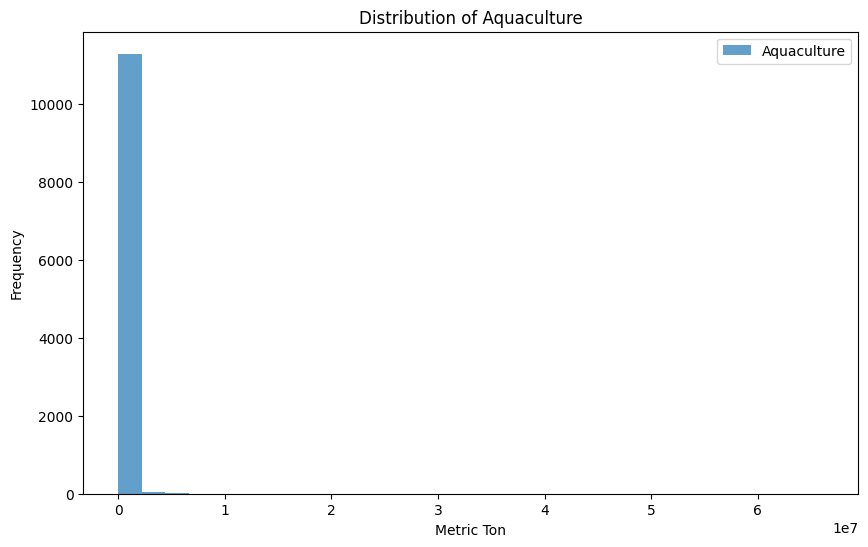

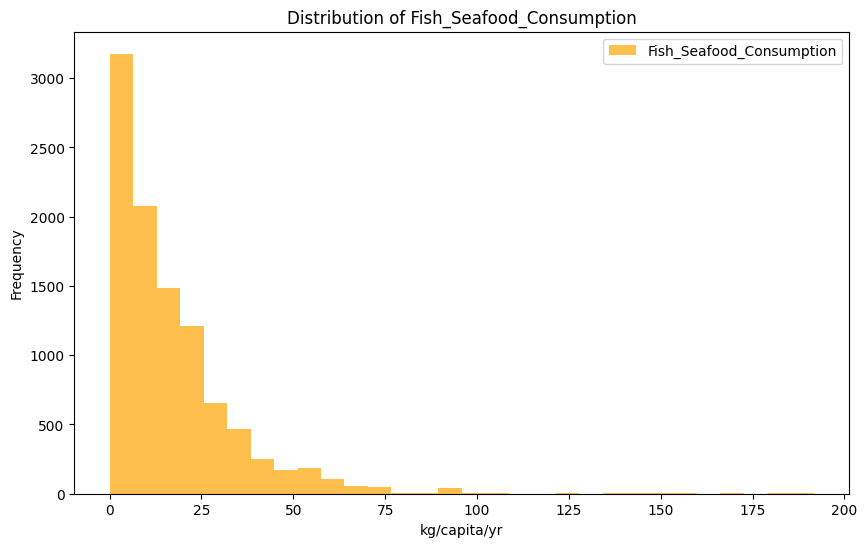

In [66]:
# Plotting the distribution of 'Aquaculture' variable
plt.figure(figsize=(10, 6))
plt.hist(df_imputed['Aquaculture'].dropna(), bins=30, alpha=0.7, label='Aquaculture')
plt.title('Distribution of Aquaculture')
plt.xlabel('Metric Ton')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of 'Fish_Seafood_Consumption' variable
plt.figure(figsize=(10, 6))
plt.hist(df_imputed['Fish_Seafood_Consumption'].dropna(), bins=30, alpha=0.7, label='Fish_Seafood_Consumption', color='orange')
plt.title('Distribution of Fish_Seafood_Consumption')
plt.xlabel('kg/capita/yr')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Since the variables are skewed, then we can use per-continent median to impute the missing values

In [67]:
# Calculate the continent median per variable
continent_median_aquaculture = df_imputed.groupby('Continent')['Aquaculture'].transform('median')
continent_fish_consumption_median = df_imputed.groupby('Continent')['Fish_Seafood_Consumption'].transform('median')
    
# Fill in missing values in the target columns with the computed median's
df_imputed['Aquaculture'] = df_imputed['Aquaculture'].fillna(continent_median_aquaculture)
df_imputed['Fish_Seafood_Consumption'] = df_imputed['Fish_Seafood_Consumption'].fillna(continent_fish_consumption_median)

In [68]:
# Check for null values
df_imputed_null_summary = df_imputed.isnull().sum()
df_imputed_null_summary

Entity                      0
Code                        0
Year                        0
Aquaculture                 0
Capture_Fisheries           0
Fish_Seafood_Consumption    0
Continent                   0
dtype: int64

**By this we managed to fill in all missing values in our DataSet. Now let's check if there is any variation in # records per country**

In [69]:
# Group by Entity and count the number of records for each country
record_counts = df_imputed.groupby('Entity').size()

# Find the most common record count
most_common_count = record_counts.mode().iloc[0]

# Filter countries with a different number of records
countries_with_different_counts = record_counts[record_counts != most_common_count].index

# Create a DataFrame for each varying country with their Year values
varying_countries_years = df_imputed[df_imputed['Entity'].isin(countries_with_different_counts)][['Entity', 'Year']]

# Group the DataFrame by Entity for clarity
grouped_varying_countries = varying_countries_years.groupby('Entity')

# Convert grouped data into individual DataFrames for each country
country_years_dfs = {country: group.reset_index(drop=True) for country, group in grouped_varying_countries}


# Display or save results
for country, df_country in country_years_dfs.items():
    print(f"Data for {country}:")
    print(df_country)
    print("\n")


Data for Andorra:
     Entity  Year
0   Andorra  1970
1   Andorra  1971
2   Andorra  1972
3   Andorra  1973
4   Andorra  1974
5   Andorra  1975
6   Andorra  1976
7   Andorra  1977
8   Andorra  1978
9   Andorra  1979
10  Andorra  1980
11  Andorra  1981
12  Andorra  1982
13  Andorra  1983
14  Andorra  1984
15  Andorra  1985
16  Andorra  1986
17  Andorra  1987
18  Andorra  1988
19  Andorra  1989
20  Andorra  1990
21  Andorra  1991
22  Andorra  1992
23  Andorra  1993
24  Andorra  1994
25  Andorra  1995
26  Andorra  1996
27  Andorra  1997
28  Andorra  1998
29  Andorra  1999
30  Andorra  2000
31  Andorra  2001
32  Andorra  2002
33  Andorra  2003
34  Andorra  2004
35  Andorra  2005
36  Andorra  2006
37  Andorra  2007
38  Andorra  2008
39  Andorra  2009
40  Andorra  2010
41  Andorra  2011
42  Andorra  2012
43  Andorra  2013
44  Andorra  2014
45  Andorra  2015
46  Andorra  2016
47  Andorra  2017
48  Andorra  2018


Data for Armenia:
     Entity  Year
0   Armenia  1988
1   Armenia  1989
2   Arme

So, although these countries has different # records compared to other countries, but the good thing is that there is no gap in between their start and end years, which is good for our visualisation purposes

Lastly, as we'll deal with log axes in our visualization, then we need to avoid having '0' values, specifically in the 'Aquaculture' and 'Capture_Fisheries' columns 

In [70]:
# Count the number of zeros per variable
zero_counts = df_imputed[['Aquaculture', 'Capture_Fisheries']].eq(0).sum()


print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Aquaculture          3776
Capture_Fisheries     430
dtype: int64


So we have lots of zeros under the 'Aquaculture' column, less under the 'Capture_Fisheries'. We'll replace these with random tiny values

In [71]:
# Replace 0 values in the 'Aquaculture' column with random values between 0.1 and 0.2
df_imputed['Aquaculture'] = df_imputed['Aquaculture'].apply(lambda x: np.random.uniform(0.1, 0.2) if x == 0 else x)

# Replace 0 values in the 'Fish_Seafodd_Consumption' column with random values between 0.1 and 0.2
df_imputed['Capture_Fisheries'] = df_imputed['Capture_Fisheries'].apply(lambda y: np.random.uniform(0.1, 0.2) if y == 0 else y)

In [72]:
# Count the number of zeros per variable
zero_counts = df_imputed[['Aquaculture', 'Capture_Fisheries']].eq(0).sum()


print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Aquaculture          0
Capture_Fisheries    0
dtype: int64


All good! We're now ready to proceed with our Vega-Lite visualization! Save the resulting DataFrame

In [73]:
df_imputed = df_imputed.rename(columns=
                                   {
                                       'Aquaculture': 'Aquaculture production (metric tons)',
                                       'Capture_Fisheries': 'Capture fisheries production (metric tons)',
                                       'Fish_Seafood_Consumption': 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'})

In [74]:
df_imputed.to_csv("world_fish.csv", index=False)